In [1]:
%display latex

# TP arithmétique et cryptographie

Durant cette séance nous nous intéressons à faire des calculs dans des structures mathématiques classiques qui sont d'une grande importance dans les applications en cryptographie.

## Introduction

Tout d'abord nous allons revenir sur la notion de calcul, et plus particulièrement sur la notion de certains *domaines de calcul*. En effet, dans SageMath nous pouvons calculer avec des entiers ou des nombres rationnels assez facilement à partir d'expression mathématiques.


In [2]:
2+2 # calcul avec des entiers

4

In [3]:
2/3+5/7 # calcul avec des nombres rationnels

29/21

En fait, la notion de calcul sur les entiers ou les rationnels est associé à la notion de *structure mathématique* $\mathbb Z$ et $\mathbb{Q}$ pour lesquels les opérations telles que l'addition et la multiplication sont *bien définies*. Par *bien définie*, on entend que l'opération est calculable et que le résultat reste dans le même ensemble de valeurs que celui des entrées : pour $\star\in\{+,\times\}$,
- $\forall x,y \in \mathbb{Z} \longrightarrow (x\star y)\in\mathbb{Z}$, et 
- $\forall x,y \in \mathbb{Q} \longrightarrow (x \star y)\in\mathbb{Q}$

Dans SageMath, les structures $\mathbb Z$ et $\mathbb Q$ sont nommées `ZZ` et `QQ`. Par exemple `QQ(3)` construit le *rationnel* $3$ alors que `ZZ(3)` construit l'entier $3$.

### Question
Vérifier au travers d'exemples que les résultats des opérations `+` et `*` sur les rationnels sont bien des rationnels. *Essayer de deviner la réponse aux questions qui suivent, puis vérifier avec l'instruction `type(...)` qui fournit le type de son argument.*
- Quels sont les types de retour de `ZZ(3)+ZZ(5)` et `QQ(3)+QQ(5)`.
- Quelle est la valeur de $\frac{6}{5}\times\frac{35}{3}$ ? Et son type de retour ?
- Que se passe-t-il si on tape `ZZ(4) * QQ(6)` ?

In [4]:
type(ZZ(3)+ZZ(5))
type(QQ(3)+QQ(5))

<class 'sage.rings.rational.Rational'>

In [5]:
a = 6/35 * 35/3
show(a)
type(a)

2

<class 'sage.rings.rational.Rational'>

In [6]:
type(ZZ(4) * QQ(6))

<class 'sage.rings.rational.Rational'>

## Opérations modulaires

<!-- On peut facilement définir la notion d'inverse pour l'addition et la multiplication à partir d'un élément neutre.

- En effet, 0 étant neutre pour l'addition $(x+0= 0+x = x$),  l'inverse de l'addition est définie comme l'opération qui donne 0 par l'addition de x et de son inverse. Cela donne $ x + \mathsf{inv}_+(x) = 0 \longrightarrow \mathsf{inv}_+(x)= -x$. On voit facilement que l'inverse de l'addition est bien définie pour $\mathbb{Q}$ et $\mathbb{Z}$: $\forall x \in \mathbb{Q,Z} \longrightarrow -x \in \mathbb{Q,Z}$


- Cela marche pareil pour définir la multiplication en remarquant que 1 est le neutre pour la multiplication. Cela donne $ x * \mathsf{inv}_*(x) = 1 \longrightarrow \mathsf{inv}_*(x)= 1/x$. Malheureuresement, on peut voir que cette inverse n'est pas bien définie pour tout  $x \in \mathbb{Q,Z}$. En effet, dans $\mathbb{Z}$ seul 1 et -1 sont inversibles alors que pour $\mathbb{Q}$ tout les éléments sauf zero sont inversibles.



C'est à partir de cette notion d'inverse que l'on peut définir les opérations de soustraction et de division.
- la soustraction est la composition de l'addition et de son inverse: $x-y = x + (-y)$
- la division est la composition de la multiplication et de son inverse: $x/y = x * (1/y)$


Pour retrouver des propriétés d'inversibilité pour les entiers similaires à celles des nombres rationnels de $ \mathbb{Q}$ (tous les éléments hormis 0 ont un inverse.), il faut se ramener à des sous-ensemble des entiers.

-->


En cryptographie, on a besoin de travailler avec des ensembles *finis* de nombres. Pour cela, on utilise l'opération *modulo*. L'ensemble des entiers *modulo* $N$ est l'ensemble des entiers entre $0$ et $N-1$, et les opérations d'addition et de multiplication se font *modulo* $N$. <!--Le sous-ensemble des entiers à $N$ élements peut être identifié par la classe des entiers modulo $N$, câd l'ensemble des entiers compris entre $0$ et $N-1$. Pour--> Concrètement, pour calculer dans cet ensemble il suffit de faire le calcul dans $\mathbb{Z}$ et de réduire le résultat *modulo* $N$ (prendre le reste de la division par $N$).

Avec ce mode de calcul les opérations  $+$ et $\times$ sont bien définies : pour $\star\in\{+,\times\}$,
$$\forall x,y \in\{0,1,\dots, N-1\} \longrightarrow (x\star y) \bmod N \in \{0,1,\dots, N-1\}$$

<!--- l'inverse de l'addition étant définie par $\mathsf{inv}_+(x) = N-x \bmod N$, cette opération est bien définie on a que $x-y=x+N-y \bmod N$  est bien un entier compris entre 0 et N-1.

Nous reviendrons un peu plus loin sur l'inverse de la multiplication.-->

Dans les questions qui suivent, on s'intéressent aux tables d'addition et de multiplication des entiers *modulo* $N$.

### Question  
Donner la table d'addition <!--et de soustraction--> de l'ensemble $\{0,1,2,3,4\}$ des entiers *modulo* $5$ : représenter la table par une matrice `Ma5` telle que $Ma5[i,j]= i+j \bmod 5$<!--et $Mb5[i,j]= i+5-j \bmod 5$-->.  *L'instruction `Matrix(n,n)` permet de construire une matrice de taille $n \times n$.*

In [7]:
m = [[0 for ù in range(5)] for _ in range(5)]
for i in range(5):
    for j in range(5):
        m[i][j] = (i+j)%5
Ma5 = Matrix(m)

Pour effectuer des additions dans l'ensemble des entiers modulo 5, on peut utiliser cette matrice. <!-- qui donnent les tables d'addition et de sopustraction des entiers modulo 5.-->
Par exemple, taper `Ma5[2,3]` pour obtenir $2+3 \bmod 5$. <!--  et Ms5[2,3] pour obtenir $2-3 \bmod 5$.-->

In [8]:
Ma5[2,3]

0

### Question 
Construire la matrice `Mp5` de multiplication des entiers modulo $5$ et utiliser cette matrice pour calculer $3^{98} \bmod 5$. *Vérifier votre résultat en comparant avec l'instruction `pow(3,n,5)`.* 

In [9]:
m = [[0 for ù in range(5)] for _ in range(5)]
for i in range(5):
    for j in range(5):
        m[i][j] = (i*j)%5
Mp5 = Matrix(m)

In [10]:
def powMp5(m, act, n, p):
    if p < 3:
        return m[act,n]
    return powMp5(m, m[act,n], n, p-1)
show(powMp5(Mp5,3,3,98))
show(pow(3,98,5))

4

4

### Question

On a vu que le domaine des entiers de $\mathbb{Z}$ se nomme `ZZ` dans SageMath. <!-- et x=ZZ(13) définit x comme l'entier 13 dans $\mathbb{Z}$.--> De manière similaire, SageMath définit l'objet représentant l'ensemble des entiers *modulo* $N$ par `Integers(N)` pour un entier `N` donné. Mathématiquement, cet ensemble est noté $\mathbb Z/N\mathbb Z$.

Par exemple, `A=Integers(50)` définit la structure mathématique correspondant aux entiers *modulo* $50$. Pour construire un élément de cette ensemble, il suffit de lui passer en paramètre un entier :
- `A(10)` construit l'entier $10$ dans cet ensemble, càd $10 \bmod 50 \rightarrow 10$ ;
- `A(57)` construit l'entier $57$ dans cet ensemble, càd $57 \bmod 50 \rightarrow 7$.

**Dans toute la suite, on travaillera avec des éléments de `Integers(N)` pour différentes valeurs de $N$ : on ne devra donc plus utiliser le *modulo* (symbole `%`) car les opérations sont automatiquement faites *modulo* $N$ dans `Integers(N)`.

**À vous de jouer :** 
- Définissez la variable `I10` définissant l'ensemble des entiers *modulo* $10$ et faite le calcul de $7\times 5$ dans cet ensemble. 
- En utilisant la méthode `random_element()` de `I10`, calculer et afficher la somme et le produit de deux élements de `I10` choisis aléatoirement. 
- Refaites le calcul de $3^{98} \bmod 5$ en utilisant la classe des entiers *modulo* $5$ de SageMath.

In [11]:
I10 = Integers(10)
I10(7*5)

5

In [12]:
r1 = I10.random_element()
r2 = I10.random_element()
show(r1)
show(r2)
show(r1+r2)
show(r1*r2)

2

6

8

2

In [13]:
I5 = Integers(5)
I5(3**98)

4

### Question

Définir deux fonctions `genMatrixAdd` et `genMatrixMul` qui prennent en paramètre un entier $N$ et qui calculent la matrice correspondant à la table d'addition et de multiplication des entiers *modulo* $N$. Remarque : on souhaite que les matrices contiennent des éléments de `Integers(N)`. *Vérifiez que vos fonctions sont correctes (vous pouvez comparez le résultat avec les matrices `Ma5` et `Mp5` définies précédemment).*

In [14]:
def genMatrixAdd(N):
    IN = Integers(N)
    m = Matrix(IN,N,N)
    for i in range(N):
        for j in range(N):
            m[i,j] = IN(i+j)
    return m

def genMatrixMul(N):
    IN = Integers(N)
    m = Matrix(IN,N,N)
    for i in range(N):
        for j in range(N):
            m[i,j] = IN(i*j)
    return m

Ma52 = genMatrixAdd(5)
Mp52 = genMatrixMul(5)
show(Ma5)
show(Ma52)
show(Mp5)
show(Mp52)

show(type(Ma52[0,0]))

[0 1 2 3 4]
[1 2 3 4 0]
[2 3 4 0 1]
[3 4 0 1 2]
[4 0 1 2 3]

[0 1 2 3 4]
[1 2 3 4 0]
[2 3 4 0 1]
[3 4 0 1 2]
[4 0 1 2 3]

[0 0 0 0 0]
[0 1 2 3 4]
[0 2 4 1 3]
[0 3 1 4 2]
[0 4 3 2 1]

[0 0 0 0 0]
[0 1 2 3 4]
[0 2 4 1 3]
[0 3 1 4 2]
[0 4 3 2 1]

<class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>

## Inverses

On peut facilement définir la notion d'inverse pour l'addition et la multiplication à partir d'un *élément neutre*, c'est-à-dire un élément $e$ tel que $\forall x, x\star e = e\star x = x$. Ainsi, $0$ est l'élément neutre de l'addition et $1$ celui de la multiplication (que ce soit dans $\mathbb Z$, $\mathbb Q$ ou $\mathbb Z/N\mathbb Z$).

- L'*inverse pour l'addition* d'un élément $x$ est l'élément $\mathsf{inv}_+(x)$ tel que $ x + \mathsf{inv}_+(x) = 0$. On voit donc que $\mathsf{inv}_+(x)= -x$ : l'inverse pour l'addition est donc ce qu'on nomme habituellement l'opposé d'un nombre, et est bien définie pour $\mathbb{Q}$ et $\mathbb{Z}$ : $\forall x \in \mathbb{Q,Z} \longrightarrow -x \in \mathbb{Q,Z}$

- De la même façon, l'*inverse pour la multiplication* se définit à partir du neutre $1$ pour la multiplication :  $\mathsf{inv}_*(x)$ est défini par $ x * \mathsf{inv}_*(x) = 1$, c'est-à-dire $\mathsf{inv}_*(x)= 1/x$. L'inverse pour la multiplication est donc ce qu'on nomme habituellement l'inverse d'un nombre. On remarque donc que tout élément non nul de $\mathbb Q$ admet un inverse (on dit qu'un tel élément est *inversible*). Mais dans $\mathbb Z$, seuls $1$ et $-1$ sont inversibles.

Remarque : comme tout entier peut être vu comme un nombre rationnel (en symboles, $\mathbb Z\subseteq\mathbb Q$), si on cherche à calculer l'inverse d'un nombre entier $n$, SageMath le considèrera comme un rationnel et renverra le rationnel $1/n$.

### Question
Que se passe-t-il quand on veut inverser l'entier $0$ ?

In [15]:
#On ne peut pas: 0 * inv(0) = 1 est impossible

<!-- À partir des notions d'inverse pour l'addition et la multiplication, on peut définir les opérations de soustraction et de division :
- la soustraction est la composition de l'addition et de son inverse: $x-y = x + (-y)$ ;
- la division est la composition de la multiplication et de son inverse: $x/y = x \times (1/y)$.

De même que pour l'inversion, la division n'est bien définie que pour les rationnels.

Pour retrouver des propriétés d'inversibilité pour les entiers similaires à celles des nombres rationnels de $ \mathbb{Q}$ (tous les éléments sauf 0 ont un inverse), il faut se ramener à des sous-ensemble des entiers.-->

On va voir que lorsqu'on travaille avec des entiers *modulo* $N$, on retrouve l'inversibilité, au moins partiellement, dont on dipose avec les rationnels.
La notion d'inverse pour l'addition ou la multiplication peut se voir directement sur les matrices représentant les tables des opérations :
- un élément $x$ est inversible pour l'addition si et seulement s'il y a un unique $0$ dans la ligne et la colonne d'indice $x$ ;
- un élément $x$ est inversible pour la multiplication si et seulement s'il y  a un unique $1$ dans la ligne et la colonne d'indice $x$.

### Question
En utilisant les matrices associées à l'addition et la multiplication des entiers *modulo* $5$, donner la liste des éléments inversibles pour l'addition, et celle des éléments inversibles pour la multiplication. *Attention à bien avoir une liste d'éléments de `Integers(N)` et pas d'entiers (vérifier avec `type(...)`).*

In [16]:
def listInv(m, typeOp):
    listInv = []
    if typeOp == "add":
        comp = 0
    else:
        comp = 1
    for i in range(m.nrows()):
        cpt0col = 0
        cpt0line = 0
        for j in range(m.nrows()):
            if m[i,j] == comp:
                cpt0col += 1
            if m[j,i] == comp:
                cpt0line += 1
        if cpt0col == 1 and cpt0line == 1:
            listInv.append(m[comp,i])
    return listInv

opposeList = listInv(Ma52, "add")
inverseList = listInv(Mp52, "mul")
show(opposeList)
show(inverseList)
show(type(opposeList[0]))

[0, 1, 2, 3, 4]

[1, 2, 3, 4]

<class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>

In [17]:
Mp52.base_ring()

Ring of integers modulo 5

### Question
Définissez les fonctions `inv_add` et `inv_mul` qui prennent en entrée un entier $N$ et un entier $x\in \{0,\dots,N-1\}$ et qui renvoient l'inverse de $x$ pour l'addition *modulo* $N$ ,et l'inverse de $x$ pour la multiplication *modulo* $N$. *Vos fonction devront construire les tables d'addition et de multiplication modulo $N$ et les utiliser pour le calcul. Si $x$ n'est pas inversible, la fonction renvoie `None`. Encore une fois, attention à bien renvoyer un élément de `Integers(N)` et pas un entier !*

Vous testerez vos fonctions pour  les valeurs de $N=17,12$ et les valeurs de $x=3,0,4$.

In [18]:
def inv_add(N, x):
    m = genMatrixAdd(N)
    listI = listInv(m, "add")
    if not(x in listI):
        return None
    for j in range(m.nrows()):
        if m[x,j] == 0:
            return m[j,0]
        
def inv_mul(N, x):
    m = genMatrixMul(N)
    listI = listInv(m, "mul")
    if not(x in listI):
        return None
    for j in range(m.nrows()):
        if m[x,j] == 1:
            return m[j,1]
        
show(inv_add(5,4))
show(inv_mul(5,4))

1

4

### Question
Proposer une fonction d'inversion générique `inv_gen` qui prend en paramètre une matrice `M` représentant une opération modulo $N$, un élément neutre `e` et un elément `x` qu'on souhaite inverser. Comme précédemment si $x$ n'est pas inversible la fonction renverra `none`. Attention, votre matrice $M$ doit être définie sur `Integers(N)` de telle sorte que `M.base_ring()` retourne `Integers(N)`.

- Vous verifierez que votre fonction générique est équivalente aux fonctions `inv_add` et `inv_mul` pour tous les entiers modulo 5

In [19]:
def inv_gen(M,e,x):
    cptCol = 0
    cptLine = 0
    save = -1
    for i in range(M.nrows()):
        if M[i,x] == e:
            cptCol += 1
            save = i
        if M[x,i] == e:
            cptLine += 1
    if cptCol == 1 and cptLine == 1:
        return M[e,save]
    else:
        return None

show(inv_gen(Ma52,0,3))
show(inv_gen(Mp52,1,1))

2

1

### Question
- Écrire deux fonctions `liste_inv_add(N)` et `liste_inv_mul(N)` qui calculent la liste des éléments inversibles pour l'addition et la multiplication *modulo* $N$ (vous utiliserez la fonction `inv_gen` de la question précédente, ainsi que les fonction `genMatrixAdd` et `genMatrixMul`).
- Regarder ce qu'il se passe pour $N=5,10,13,16$.

In [20]:
def liste_inv_add(N):
    m = genMatrixAdd(N)
    reList = []
    for i in range(N):
        res = inv_gen(m, 0, i)
        if res != None and not(res in reList):
            reList.append(res)
    return reList

def liste_inv_mul(N):
    m = genMatrixMul(N)
    reList = []
    for i in range(N):
        res = inv_gen(m, 1, i)
        if res != None and not(res in reList):
            reList.append(res)
    return reList

show(liste_inv_add(5))
show(liste_inv_mul(5))

[0, 4, 3, 2, 1]

[1, 3, 2, 4]

In [21]:
show(liste_inv_add(10))
show(liste_inv_mul(10))

[0, 9, 8, 7, 6, 5, 4, 3, 2, 1]

[1, 7, 3, 9]

In [22]:
show(liste_inv_add(13))
show(liste_inv_mul(13))
show(liste_inv_add(16))
show(liste_inv_mul(16))

[0, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

[1, 7, 9, 10, 8, 11, 2, 5, 3, 4, 6, 12]

[0, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

[1, 11, 13, 7, 9, 3, 5, 15]

On remarque que pour toute valeur de $N$, tous les éléments sont inversibles pour l'addition, mais que ce n'est pas le cas pour la division. D'une part $0$ n'est jamais inversible, mais dans certains cas d'autres éléments ne le sont pas non plus.




### Question 
Lister tous les entiers $N$ entre $2$ et $30$ pour lesquels tous les éléments sauf $0$ sont inversibles pour la multiplication *modulo* $N$. Que remarquez-vous ?

In [23]:
def listAllInv():
    listAll = []
    for N in range(2,31):
        tempList = liste_inv_mul(N)
        allIn = True
        for i in range(1,N):
            if not(i in tempList):
                allIn = False
                break
        if allIn:
            listAll.append(N)
    return listAll

listAllInv()

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

## Soustraction, division

À partir des notions d'inverse pour l'addition et la multiplication, on peut définir les opérations de soustraction et de division :
- la soustraction est la composition de l'addition et de son inverse: $x-y = x + \mathsf{inv}_+(y)$ ;
- la division est la composition de la multiplication et de son inverse: $x/y = x \times \mathsf{inv}_\times(y)$.

Un autre point de vue est de se dire que l'inverse pour l'addition est défini par la soustraction $0-y$, alors que l'inverse pour la multiplication est défini par la division $1/y$. Autrement dit, il est équivalent de considérer les opérations $\{+,\times,\mathsf{inv}_+,\mathsf{inv_\times}\}$ ou les opérations $\{+,\times,-,/\}$.

On a vu précédemment que tous les éléments non nuls sont inversibles pour la multiplication *modulo* $N$ si et seulement si $N$ est premier. 

### Question
Calculer les tables de soustraction et de division modulo $5$ à partir des tables d'addition, de multiplication et de la fonction `inv_gen`. *En case $(i,j)$, la table contient le résultat de l'opération $i\star j$ pour $\star\in\{-,/\}$. Pour la division, on pourra mettre un $0$ lorsque la division n'est pas définie (division par zéro).*

In [24]:
I5 = Integers(5)
MaSous5 = Matrix(I5,5,5)
MaDiv5 = Matrix(I5,5,5)
for i in range(5):
    for j in range(5):
        MaSous5[i,j] = I5(i+inv_gen(Ma52,0,j))
        invMul = inv_gen(Mp52,1,j)
        if invMul == None:
            MaDiv5[i,j] = I5(0)
        else:
            MaDiv5[i,j] = I5(i*inv_gen(Mp52,1,j))
show(MaSous5)
show(MaDiv5)

[0 4 3 2 1]
[1 0 4 3 2]
[2 1 0 4 3]
[3 2 1 0 4]
[4 3 2 1 0]

[0 0 0 0 0]
[0 1 3 2 4]
[0 2 1 4 3]
[0 3 4 1 2]
[0 4 2 3 1]

### Question

Définir les fonctions `genMatrixSub` et `genMatrixDiv` qui pour un entier $N$ génèrent les matrices correspondant aux tables de soustraction et de division *modulo* $N$. *Vérifier en comparant avec les matrices `Ms5` et `Md5` définies précédemment.*

In [25]:
def genMatrixSub(N):
    IN = Integers(N)
    m = Matrix(IN, N, N)
    mAdd = genMatrixAdd(N)
    for i in range(N):
        for j in range(N):
            m[i,j] = IN(i+inv_gen(mAdd,0,j))
    return m

def genMatrixDiv(N):
    IN = Integers(N)
    m = Matrix(IN, N, N)
    mMul = genMatrixMul(N)
    for i in range(N):
        for j in range(N):
            invMul = inv_gen(mMul,1,j)
            if invMul == None:
                m[i,j] = IN(0)
            else:
                m[i,j] = IN(i*invMul)
    return m

ms5 = genMatrixSub(5)
md5 = genMatrixDiv(5)
show(ms5)
show(MaSous5)
show(md5)
show(MaDiv5)

[0 4 3 2 1]
[1 0 4 3 2]
[2 1 0 4 3]
[3 2 1 0 4]
[4 3 2 1 0]

[0 4 3 2 1]
[1 0 4 3 2]
[2 1 0 4 3]
[3 2 1 0 4]
[4 3 2 1 0]

[0 0 0 0 0]
[0 1 3 2 4]
[0 2 1 4 3]
[0 3 4 1 2]
[0 4 2 3 1]

[0 0 0 0 0]
[0 1 3 2 4]
[0 2 1 4 3]
[0 3 4 1 2]
[0 4 2 3 1]

On a vu que tous les éléments sont inversibles pour l'addition *modulo* $N$. D'autre part, si $N$ est premier, tous les éléments non nuls sont inversibles pour la multiplication. Cela signifie que les quatre opérations $\{+,\times,-,/\}$ sont bien définies : $x\star y\in\{0,\dotsc,N-1\}$ pour tout $x,y\in\{0,\dotsc,N-1\}$ et $\star\in\{+,\times,-,/\}$ (avec la condition $y\neq 0$ si $\star=/$). On peut donc calculer *modulo* un nombre premier comme on calcule avec les nombres rationnels. On dit que les entiers *modulo* un nombre premier forment un *corps*. 

Dans la suite, on va s'intéresser à ce qui se passe pour $N$ non premier. Dans ce cas, on a déjà vu que certains éléments ne sont pas inversibles pour la multiplication.

## Groupe multiplicatif

<!--On a vu que tous les éléments sont inversibles pour l'addition *modulo* $N$. D'autre part, si $N$ est premier, tous les éléments non nuls sont inversible pour la multiplication pour alors les quatre opérations $\{+,\times,-,/\}$ sont bien définies : $x\star y\in\{0,\dotsc,N-1\}$ pour tout $x,y\in\{0,\dotsc,N-1\}$ et $\star\in\{+,\times,-,/\}$ (avec la condition $y\neq 0$ si $\star=/$). Si $N$ n'est pas premier, on a vu que certains éléments non nuls ne sont pas inversibles pour la multiplication, et on ne peut donc pas définir de division sur l'ensemble des entiers *modulo* $N$.



La liste de nombres précédente ne comporte que des nombres premiers. C'est une propriété mathématique importante : si
-->

Quand $N$ est premier, les entiers $\{1,2,\dots,N-1\}$ forment un *groupe* pour la multiplication modulo $N$, c'est-à-dire que ce sous-ensemble $E$ vérifie les deux conditions suivantes :
- pour tout $x,y\in E$, $x\times y\in E$ (*opération interne*) ;
- pour tout $x\in E$, il existe un unique inverse de $x$ dans $E$ pour la multiplication (*inversibilité*).
 
Quand $N$ n'est pas premier, certains éléments ne sont pas inversibles pour la multiplication et $\{1,\dotsc,N-1\}$ n'est pas un groupe. 

On va voir qu'il existe toujours, même pour $N$ non premier, un *groupe* pour la multiplication *modulo* $N$, c'est-à-dire un sous-ensemble $E$ qui vérifie les deux conditions précédentes. 

**Remarque.** On cherche un groupe le plus grand possible. En effet, le sous-ensemble $\{1\}$ forme toujours un groupe pour la multiplication *modulo* $N$, car $1\times 1 = 1$ et $1$ est son propre inverse.


### Question
Écrire une fonction `estInterne(M,E)` qui prend en entrée une table d'opération `M` (une matrice), un sous-ensemble $E$, et teste si l'opération représentée par la matrice `M` est interne au sous-ensemble $E$. *On peut définir la sous-table d'opération restreinte à E avec M[E,E].* 

- Vous testerez votre fonction avec la table de multiplication modulo 5 et l'ensemble d'entiers E={1,2,3,4}.
- Vous verifierez votre fonction avec les tables de multiplication modulo $N$ pour $2 \leq N\leq 31$. Pour le sous-ensemble E, vous utiliserez la fonction `liste_inv_mul(N)`.
- Montrez que si on remplace la table de multiplication par la table d'addition et que l'on prend le même sous-ensemble, l'opération `estIterne` renvoie toujours faux.

In [57]:
def estInterne(M,E):
    for e1 in E:
        for e2 in E:
            if not(M[e1,e2] in E):
                return False
    return True
estInterne(Mp5, [1,2,3,4])

True

In [58]:
for N in range(2,32):
    if not(estInterne(genMatrixMul(N),liste_inv_mul(N))):
        show(N)

In [59]:
for N in range(2,32):
    if estInterne(genMatrixAdd(N),liste_inv_mul(N)):
        print(N)

### Question
- Écrire une fonction `estGroupe(Mp, E)` qui prend en entrée une table de *multiplication* `Mp` et vérifie si le sous-ensemble $E$ forme un groupe pour la multiplication, en vérifiant les deux propriétés énoncées au-dessus.
- Pour $N=15$, vérifier que le sous-ensemble $E=\{1,2,4,7,8,11,13,14\}$ forme un groupe pour la multiplication modulo $15$. Afficher les tables de multiplications et de division dans ce groupe.

In [67]:
def estGroupe(Mp, E):
    if not(estInterne(Mp, E)):
        return False
    for e1 in E:
        cptInv = 0
        for e2 in E:
            if e1*e2 == 1:
                cptInv += 1
        if cptInv != 1:
            return False
    return True

In [70]:
MaMul15 = genMatrixMul(15)
MaDiv15 = genMatrixDiv(15)
E15 = liste_inv_mul(15)
show(estGroupe(MaMul15, E15))
show(MaMul15[E15,E15])
show(MaDiv15[E15,E15])

True

[ 1  8  4 13  2 11  7 14]
[ 8  4  2 14  1 13 11  7]
[ 4  2  1  7  8 14 13 11]
[13 14  7  4 11  8  1  2]
[ 2  1  8 11  4  7 14 13]
[11 13 14  8  7  1  2  4]
[ 7 11 13  1 14  2  4  8]
[14  7 11  2 13  4  8  1]

[ 1  2  4  7  8 11 13 14]
[ 8  1  2 11  4 13 14  7]
[ 4  8  1 13  2 14  7 11]
[13 11  7  1 14  8  4  2]
[ 2  4  8 14  1  7 11 13]
[11  7 14  2 13  1  8  4]
[ 7 14 13  4 11  2  1  8]
[14 13 11  8  7  4  2  1]

### Question
- Quelle propriété remarquez-vous sur l'ensemble $\{1,2,4,7,8,11,13,14\}$ par rapport à l'entier 15 ? *Indication : quels sont les entiers manquants ?*
- Appliquer votre propriété pour trouver un sous-ensemble de $\{1,2,3,4,5,6,7,8,9\}$ qui forme un groupe pour la multiplication modulo 10. *Trouver la solution théoriquement, puis vérifier.*

In [79]:
#il manque les nombres divisibles par les diviseurs 15 (hormis 1)
#diviseurs de 10: 2 et 5, divisibles par les diviseurs hormis 1, plus petits que 10: 2, 4, 5, 6, 8
# sous-ensemble restant: {1,3,7,9}
show(type(liste_inv_mul(10)[0]))
estGroupe(genMatrixMul(10), liste_inv_mul(10))

<class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>

True

### Question
Soit $p=3$ et $q=5$, donner le code qui permet de calculer l'ensemble des entiers compris entre $1$ et $p\times q-1$ qui ne sont ni divisibles par $p$ ni par $q$.

In [80]:
listEnt = []
p = 3
q = 5
for i in range(1,p*q):
    if not(i%p == 0 or i%q == 0):
        listEnt.append(i)
show(listEnt)

[1, 2, 4, 7, 8, 11, 13, 14]

### Question
Écrire une fonction `nondivPQ(p,q)` qui prend 2 nombres premiers $p$ et $q$ et qui retourne la liste des nombres compris entre 1 et $pq$ et qui ne sont divisibles ni par $p$ ni par $q$.

Vous montrerez que `nondivPQ(p,q)` et `liste_inv_mul(p*q)` renvoient le même résultat pour $p$ et $q$ premiers. Pour cela vous vérifierez que c'est bien le cas pour tous les couples de nombres premiers $(p,q)$ parmi les 10 premiers nombres premiers (il existe une fonction sage pour générer la liste de ces nombres premiers).

In [85]:
def nondivPQ(p, q):
    listEnt = []
    IN=Integers(p*q)
    for i in range(1,p*q):
        if not(i%p == 0 or i%q == 0):
            listEnt.append(IN(i))
    return listEnt

In [86]:
P = Primes()
listP = [P.unrank(i) for i in range(7)]

for e1 in listP:
    for e2 in listP:
        l1 = nondivPQ(e1, e2)
        l1.sort()
        l2 = liste_inv_mul(e1*e2)
        l2.sort()
        if l1 != l2:
            show("MARCHE PAS")
            show(e1)
            show(e2)

### Question
Vérifier, à l'aide des fonctions `nondivPQ` et `estGroupe`, que pour tout couple $(p,q)$ de nombres premiers l'ensemble des éléments de `nondivPQ(p,q)` forme un groupe pour la multiplication modulo $N=p\times q$.
- vous testerez dans un premier temps votre fonction avec $p = 5$ et $q = 7$,
- puis vous la testerez pour tout les couples de nombre premiers $(p,q)$ parmi les 10 premiers nombres premiers .

In [87]:
p = 5
q = 7
estGroupe(genMatrixMul(p*q), nondivPQ(p,q))

True

In [91]:
P = Primes
listP = [P().unrank(i) for i in range(7)]   ##ici on a clairement un souci d'opti au dessus de 7
show(listP)
for e1 in listP:
    for e2 in listP:
        if not(estGroupe(genMatrixMul(e1*e2), nondivPQ(e1,e2))):
            show("MARCHE PAS")
            show(e1)
            show(e2)

[2, 3, 5, 7, 11, 13, 17]

### Question 
On va généraliser les questions précédentes à un entier $N$ quelconque, en vérifiant que le sous-ensemble $E$ des entiers qui ne sont multiples d'aucun facteur premier de $N$, forme un groupe pour la multiplication. 

- généraliser `nondivPQ` à un $N$ quelconque pour renvoyer l'ensemble des entiers qui ne sont multiples d'aucun facteur premier de $N$. *La fonction `N.factor()` calcule la factorisation de $N$ en facteurs premiers. Le retour de la fonction est une liste de couples représentant le facteur et son exposant dans la factorisation.*
- proposer une fonction qui vérifie pour un entier $N$ que l'ensemble en question forme bien un groupe pour la multiplication.
- tester pour tous les entiers  $N$ entre 1 et 100.

In [93]:
def nondivPQGen(N):
    IN=Integers(N)
    if N == 1:
        listFact = [1]
    else:
        listFact = [i[0] for i in N.factor()]
    listEnt = []
    for i in range(1,N):
        if i in listFact:
            continue
        mult = False
        for j in listFact:
            if i%j == 0:
                mult = True
                break
        if not mult: 
            listEnt.append(IN(i))
    return listEnt
    
def ensembleEstGroupe(N):
    return estGroupe(genMatrixMul(N), nondivPQGen(N))

for i in srange(1,101):
    if not ensembleEstGroupe(i):
        show("MARCHE PAS")
        show(i)

## Inversibilité et pgcd

On vient de voir que pour tout entier $N$, il existe un sous-ensemble de $G\subset E=\{1,2,\dots,N-1\}$ qui définit un groupe pour la multiplication modulo $N$. On dira de $G$ qu'il est le sous-groupe multiplicatif des entiers modulo $N$.

- Si $N$ est un nombre premier alors le sous-ensemble de $G$ est formé par tous les entiers compris entre 1 et N-1.
- Si par contre $N=p\times q$ avec $p$ et $q$ des nombres premiers alors le sous-ensemble $G$ est formé des entiers divisibles ni par $p$ ni par $q$, autrement dit ceux dont le pgcd avec $N$ est égal à $1$. Dans ce cas, le nombre d'entiers dans $G$ est $(p-1)\times(q-1)$.

De manière plus générale, pour tout $N$, le sous-ensemble $G$ est formé des entiers qui sont premiers avec $N$, càd tous les entiers $x\in \{1,\dots,N-1\}$ tels que $\operatorname{pgcd}(x,N)=1$. L'indicatrice d'Euler, notée $\varphi(N)$, donne exactement le nombre d'éléments de $G$. 

### Question
Retrouver les éléments inversibles *modulo* $35$ en utilisant la propriété sur le pgcd, et vérifier que le nombre d'éléments trouvés vaut bien $\varphi(35)$. *Le pgcd de $a$ et $b$ se calcule avec `gcd(a,b)`, et $\varphi(N)$ avec `euler_phi(N)`.*

In [94]:
N1 = 35
show(euler_phi(N1))
premAvecN = [i for i in range(1,N1) if gcd(i,N1) == 1]
show(premAvecN)

24

[1,
 2,
 3,
 4,
 6,
 8,
 9,
 11,
 12,
 13,
 16,
 17,
 18,
 19,
 22,
 23,
 24,
 26,
 27,
 29,
 31,
 32,
 33,
 34]

### Question
Pour différentes valeur de $N$, calculer $z^{\varphi(N)} \bmod N$ pour tous les éléments inversibles de $\{1,\dotsc,N\}$. Que remarquez-vous ?  

In [95]:
N2 = 21
inverses = liste_inv_mul(N2)
show(inverses)
euler = euler_phi(N2)
show(euler)
for z in inverses:
    show(z**euler)
    
##qqsoit N, z**euler vaut 1

[1, 11, 16, 17, 8, 19, 2, 13, 4, 5, 10, 20]

12

1

1

1

1

1

1

1

1

1

1

1

1

On remarque que pour tout $z$ dans le groupe multiplicatif $G$ modulo $N$, $z^{\varphi(n)} = 1$. On définit l'*ordre* d'un entier $z\in G$, noté $\operatorname{ord}(z)$, comme étant le plus petit entier $k>0$ tel que $z^k=1 \bmod N$. On a donc $\operatorname{ord}(z)\le\varphi(N)$.

### Question
- En utilisant directement la structure `Integers(N)` pour faire les calculs modulo $N$, écrire une fonction `ord_mul_modN(x, N)` qui calcule l'ordre de $x$ *modulo* $N$, quand $x$ est inversible *modulo* $N$.
- Donner la liste des couples $(x,\operatorname{ord}(x))$ pour tous les entiers $x$ qui sont inversibles pour la multiplication *modulo* $N$, pour $N=5,15,17$.

*Vérifier que vos résultats sont corrects en utilisant la fonction `pow(x,k,N)` qui calcule $x^k \bmod N$.*

In [96]:
def ord_mul_modN(x, N):
    IN = Integers(N)
    if x in liste_inv_mul(N):
        for k in range(1,euler_phi(N)+1):
            if IN(x**k) == 1:
                return k
    return None


In [100]:
listOrd = []
for N in [5,15,17]:
    for x in liste_inv_mul(N):
        ordre = ord_mul_modN(x, N)
        if ordre is not None:
            listOrd.append((x, ordre, N))
for tup in listOrd:
    if pow(tup[0],tup[1],tup[2]) != 1:
        show("MARCHE PAS")
        show(tup)
        show(pow(tup[0],tup[1],tup[2]))

### Question
Définir une fonction `liste_ord_mul` qui étant donné un entier N renvoie la liste des ordres possibles de tous les éléments inversibles pour la multiplication modulo $N$. <!--Vous pourrez utilisez la méthode **multiplicative_order()** qui pour un élement x de Integer(N) donne l'ordre mutliplicatif de x modulo N.-->
*Tester pour tous les entiers $N$ entre $2$ et $40$.*

In [101]:
def liste_ord_mul(N):
    listOrd = []
    for x in liste_inv_mul(N):
        ordre = ord_mul_modN(x, N)
        if ordre is not None:
            listOrd.append(ordre)
    return listOrd

In [102]:
for N in srange(2,41):
    show(liste_ord_mul(N))

[1]

[1, 2]

[1, 2]

[1, 4, 4, 2]

[1, 2]

[1, 3, 6, 3, 6, 2]

[1, 2, 2, 2]

[1, 6, 3, 6, 3, 2]

[1, 4, 4, 2]

[1, 10, 5, 5, 5, 10, 10, 10, 5, 2]

[1, 2, 2, 2]

[1, 12, 3, 6, 4, 12, 12, 4, 3, 6, 12, 2]

[1, 6, 6, 3, 3, 2]

[1, 4, 2, 4, 4, 2, 4, 2]

[1, 4, 4, 2, 2, 4, 4, 2]

[1, 8, 16, 4, 16, 16, 16, 8, 8, 16, 16, 16, 4, 16, 8, 2]

[1, 6, 3, 6, 3, 2]

[1, 18, 18, 9, 9, 9, 3, 6, 9, 18, 3, 6, 18, 18, 18, 9, 9, 2]

[1, 4, 4, 2, 2, 4, 4, 2]

[1, 6, 3, 6, 2, 6, 6, 2, 3, 6, 6, 2]

[1, 5, 5, 10, 5, 10, 5, 10, 10, 2]

[1,
 11,
 11,
 11,
 22,
 11,
 22,
 11,
 11,
 22,
 22,
 11,
 11,
 22,
 22,
 11,
 22,
 11,
 22,
 22,
 22,
 2]

[1, 2, 2, 2, 2, 2, 2, 2]

[1, 20, 20, 10, 5, 4, 20, 10, 5, 20, 20, 10, 5, 20, 4, 10, 5, 20, 20, 2]

[1, 3, 4, 12, 3, 12, 12, 6, 12, 4, 6, 2]

[1, 18, 9, 18, 9, 6, 3, 18, 9, 18, 9, 6, 3, 18, 9, 18, 9, 2]

[1, 6, 6, 3, 6, 2, 2, 6, 6, 6, 3, 2]

[1,
 28,
 28,
 14,
 14,
 14,
 7,
 28,
 14,
 28,
 28,
 4,
 14,
 28,
 28,
 7,
 4,
 28,
 28,
 7,
 28,
 14,
 7,
 7,
 7,
 28,
 28,
 2]

[1, 4, 2, 4, 4, 2, 4, 2]

[1,
 5,
 30,
 5,
 3,
 6,
 15,
 5,
 15,
 15,
 30,
 30,
 30,
 15,
 10,
 5,
 30,
 15,
 15,
 15,
 30,
 30,
 10,
 30,
 3,
 6,
 10,
 15,
 10,
 2]

[1, 8, 8, 4, 4, 8, 8, 2, 2, 8, 8, 4, 4, 8, 8, 2]

[1, 10, 5, 10, 10, 10, 2, 10, 10, 5, 10, 10, 10, 2, 5, 10, 10, 10, 5, 2]

[1, 16, 16, 16, 8, 16, 4, 8, 8, 4, 16, 8, 16, 16, 16, 2]

[1,
 12,
 12,
 6,
 2,
 4,
 6,
 3,
 12,
 4,
 3,
 12,
 12,
 6,
 4,
 12,
 6,
 6,
 4,
 2,
 6,
 12,
 12,
 2]

[1, 6, 6, 6, 3, 2, 2, 6, 3, 6, 6, 2]

[1,
 36,
 18,
 18,
 36,
 4,
 9,
 12,
 9,
 3,
 6,
 9,
 36,
 12,
 36,
 9,
 36,
 36,
 36,
 36,
 18,
 36,
 12,
 36,
 18,
 3,
 6,
 18,
 12,
 18,
 4,
 36,
 9,
 9,
 36,
 2]

[1, 18, 9, 3, 9, 3, 18, 18, 9, 18, 9, 9, 6, 18, 6, 18, 9, 2]

[1,
 12,
 6,
 4,
 12,
 4,
 6,
 12,
 2,
 3,
 6,
 12,
 12,
 3,
 6,
 2,
 12,
 6,
 4,
 12,
 4,
 6,
 12,
 2]

[1, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2]

### Question
Vérifier que pour tous les nombres premiers $< 40$, les ordres des éléments inversibles pour la multiplication modulo $N$ divisent tous $N-1$. *Vous pourrez utiliser la fonction Sage `prime_range(N)` qui donne la liste des premiers inférieur à N.*

In [103]:
listP = prime_range(40)
for p in listP:
    for ordre in liste_ord_mul(p):
        if (p-1)%ordre != 0:
            show("MARCHE PAS")
            show(p)
            show(ordre)

### Question
De manière similaire, montrer (pour $p,q<40$) que si $N=p\times q$ avec $p$ et $q$ des nombres premiers différent alors les ordres des éléments inversibles pour la multiplication modulo $N$ divisent tous $(p-1)\times(q-1)$. 

In [125]:
listP = prime_range(15)
show(prime_range(15))
for e1 in listP:
    for e2 in listP:
        if e1 != e2:
            for ordre in liste_ord_mul(e1*e2):
                if (e1-1)*(e2-1)%ordre != 0:
                    show("MARCHE PAS")
                    show("e1:", e1, " e2:", e2)
                    show(ordre)

[2, 3, 5, 7, 11, 13]

### Question
En réalité, la propriété observée est vraie pour tout $N$ : les ordres des éléments inversibles pour la multiplication *modulo* $N$ divisent tous $\varphi(N)$. Vérifier la propriété pour pour tout $N \le 40$.

In [116]:
for N in range(2,41):
    euler = euler_phi(N)
    for ordre in liste_ord_mul(N):
        if euler%ordre != 0:
            show("MARCHE PAS")
            show(N)
            show(euler)
            show(ordre)

## Cryptosystème RSA

Le système de chiffrement RSA est l'un des systèmes cryptographique les plus utilisées dans votre vie de tous les jours (par exemple il est utilisé quand vous payez en carte bleue). Ce protocole s'appuie sur des calculs avec des entiers modulo $N$ et il s'appuie sur la structure de sous-groupe multiplicatif que nous avons entre-apercu.

L'idée est de prendre un entier $N=p \times q$ ou $p$ et $q$ sont deux nombres premiers.
Comme vous avez vu que l'ordre des éléments inversibles pour la multiplication modulo $N$ est toujours divisible par $(p-1)\times (q-1)$ on a la propriété suivante:

$\forall x \in \{1,\dots,N-1\}$ tel que $pgcd(x,N)=1$ alors $x^{(p-1)\times (q-1)} \bmod N= 1$

### Question
Vérifier cette propriété pour $N=55$. *Vérifier également que la propriété est fausse si on ne suppose pas $\operatorname{pgcd}(x,N)=1$.*

In [131]:
N = 55
for x in range(1,N):
    if gcd(x,N) == 1:
        if pow(x,40,N)!=1:
            show("MARCHE PAS")
            show(gcd(x,N))
            show(pow(x,40,N))

L'idée du chiffrement RSA est d'utiliser le calcul des entiers modulo $N$ avec un entier $N=p \times q$ où $p,q$ sont premiers. On définit une paire de clé $(e,d)$ avec $e,d$ deux entiers non-nuls plus petit que $N$, et on dit que la paire $(N,e)$ est la clé publique et que la paire $(N,d)$ est la clé secrète. 

Lorsque quelqu'un veut envoyer un message $m$ chiffré à Alice, il lui suffit d'utiliser la clé publique $(N,e)$ d'Alice (qui est connue de tous). Par simplicité, on considèrera que le message $m$ est un entier dans $\{1,\dots,N-1)$ tel que $pgcd(m,N)=1$. Le chiffrement de $m$ par la clé publique d'Alice consiste à calculer $C_m = m^e \bmod N$.

Pour déchiffrer le message, il faut soit:
- calculer $m$ ou $d$ en fonction de $C_m,e$ et $N$, ce qui est en fait un problème difficile (complexité sous-exponentielle)
- soit connaitre la clé privé $(N,d)$ que seul Alice connait. En effet, pour Alice il suffit de calculer
$m = C_m^d \bmod N$ (complexité quasi-linéaire)


### Question

Soit $N=5\times 11$, $m=31$, $e=3$ et $d=42$, montrer que le déchiffrement de RSA avec la clé privée $d$ fonctionne bien.

In [133]:
N=5*11
IN=Integers(N)
m=IN(31)
e=IN(3)
d=IN(42)
cle=(e,d)
chiffre=m**e
dechiffre=chiffre**d

show("origin:",m)
show("chiffre:",chiffre)
show("dechiffre:",dechiffre)

'origin:' 31

'chiffre:' 36

'dechiffre:' 31

Toute la magie de ce protocole de cryptage réside dans le calcul de la paire d'entiers $(e,d)$. En effet, $e$ doit être choisi de telle sorte que $pgcd(e,(p-1)\times(q-1))=1$. Cette condition implique que $e$ est inversible modulo $(p-1)\times(q-1)$. Il suffit de poser $d=1/e \bmod (p-1)\times(q-1)$ pour faire marcher le protocole. 

En effet, par définition de $e$ et $d$ on a que $d*e = 1 \bmod (p-1)\times(q-1)$. Par conséquent, on a que $de= 1 + k \times (p-1)\times(q-1)$ avec $k$ un entiers.


Maintenant, si on considère le sous-groupe $G$ des inversibles pour la multiplication modulo $N$, on a vu que pour tout élément $x\in G$ l'ordre de $x$ divise $(p-1)\times(q-1)$. Cela implique donc que $x^{(p-1)\times(q-1)}=1 \bmod N$.

En reprenant le protocole RSA, on a que le déchiffrement calcule
$C_m^e \bmod N = {(m^d)}^e \bmod N = m^{de} \bmod N= m^{1 + k \times (p-1)\times(q-1)} \bmod N = m \times m^{k \times (p-1)\times(q-1)}= m \times {(m^{(p-1)\times(q-1)})}^k = m \times 1^k \bmod N=m$


### Question
En considérant $N=17*11=187$, $m=101$, calculer $10$ paires d'entier $(e,d)$ au hasard tel que le protocole RSA fonctionne. À chaque fois vous afficherez $e$ et $d$ ainsi que le message chiffré et son déchiffrement.

In [177]:
from random import randint
def generation():
    p=17
    q=11
    N=p*q
    IN=Integers(N)
    m=IN(101)
    #inv_mul(N,x) -> renvoie l'inverse pas la multiplication de x mod N
    paires=[]
    I2=Integers((p-1)*(q-1))
    while len(paires)<10:
        d=randint(2,N)
        e=I2(1/d) if gcd(d,euler_phi(N))==1 else None
        if e != None and I2(d*e)==1:
            if (d,e) not in paires and (e,d) not in paires and e!=1 and d!=1:
                paires.append((d,e))
    #show(paires[0][0])
    interet=[]
    for d,e in paires:
        c=IN(m)**e
        D=IN(c)**d
        #show("d:",d, "  e:",e)
        #show("origin:", m," /chiffre:", c, " /dechiffre:",D)
        if c==m:
            interet.append((d,e))
    return interet

In [184]:
interet=[]
for i in range(10000):
    interet+=generation()
interet=list(dict.fromkeys(interet))
show(interet)
11 41 61 71 
21 51 91


[(11, 131),
 (21, 61),
 (171, 131),
 (61, 21),
 (151, 71),
 (31, 31),
 (101, 141),
 (131, 11),
 (41, 121),
 (121, 41),
 (91, 51),
 (111, 111),
 (51, 91),
 (71, 151),
 (81, 81),
 (181, 61),
 (141, 101)]

In [217]:
def aFaire(m):
    IN=Integers(187)
    l=[]
    for i in range(1,188):
        if IN(m**i) == m:
            l.append(i)
    return l

In [194]:
IN(m**2)

103

In [221]:
l = []
for i in range(1,187):
    l.append((i,aFaire(i)[1]-aFaire(i)[0]))

show(l)


[(1, 1),
 (2, 40),
 (3, 80),
 (4, 20),
 (5, 80),
 (6, 80),
 (7, 80),
 (8, 40),
 (9, 40),
 (10, 16),
 (11, 16),
 (12, 16),
 (13, 20),
 (14, 80),
 (15, 40),
 (16, 10),
 (17, 10),
 (18, 10),
 (19, 40),
 (20, 80),
 (21, 4),
 (22, 16),
 (23, 16),
 (24, 80),
 (25, 40),
 (26, 40),
 (27, 80),
 (28, 80),
 (29, 80),
 (30, 20),
 (31, 80),
 (32, 8),
 (33, 2),
 (34, 1),
 (35, 10),
 (36, 40),
 (37, 80),
 (38, 20),
 (39, 80),
 (40, 80),
 (41, 80),
 (42, 40),
 (43, 8),
 (44, 16),
 (45, 16),
 (46, 80),
 (47, 20),
 (48, 80),
 (49, 40),
 (50, 10),
 (51, 10),
 (52, 10),
 (53, 40),
 (54, 16),
 (55, 4),
 (56, 16),
 (57, 80),
 (58, 80),
 (59, 40),
 (60, 40),
 (61, 80),
 (62, 80),
 (63, 80),
 (64, 20),
 (65, 16),
 (66, 8),
 (67, 2),
 (68, 10),
 (69, 5),
 (70, 40),
 (71, 80),
 (72, 20),
 (73, 80),
 (74, 80),
 (75, 80),
 (76, 8),
 (77, 8),
 (78, 16),
 (79, 80),
 (80, 80),
 (81, 20),
 (82, 80),
 (83, 40),
 (84, 10),
 (85, 10),
 (86, 5),
 (87, 8),
 (88, 16),
 (89, 4),
 (90, 80),
 (91, 80),
 (92, 80),
 (93, 40),
 (94, 40),
 (95, 80),
 (96, 80),
 (97, 80),
 (98, 4),
 (99, 16),
 (100, 8),
 (101, 10),
 (102, 5),
 (103, 5),
 (104, 40),
 (105, 80),
 (106, 20),
 (107, 80),
 (108, 80),
 (109, 16),
 (110, 8),
 (111, 8),
 (112, 80),
 (113, 80),
 (114, 80),
 (115, 20),
 (116, 80),
 (117, 40),
 (118, 10),
 (119, 5),
 (120, 2),
 (121, 8),
 (122, 16),
 (123, 20),
 (124, 80),
 (125, 80),
 (126, 80),
 (127, 40),
 (128, 40),
 (129, 80),
 (130, 80),
 (131, 16),
 (132, 4),
 (133, 16),
 (134, 40),
 (135, 10),
 (136, 5),
 (137, 5),
 (138, 40),
 (139, 80),
 (140, 20),
 (141, 80),
 (142, 16),
 (143, 16),
 (144, 8),
 (145, 40),
 (146, 80),
 (147, 80),
 (148, 80),
 (149, 20),
 (150, 80),
 (151, 40),
 (152, 10),
 (153, 2),
 (154, 1),
 (155, 8),
 (156, 80),
 (157, 20),
 (158, 80),
 (159, 80),
 (160, 80),
 (161, 40),
 (162, 40),
 (163, 80),
 (164, 16),
 (165, 16),
 (166, 4),
 (167, 80),
 (168, 40),
 (169, 10),
 (170, 5),
 (171, 10),
 (172, 40),
 (173, 80),
 (174, 20),
 (175, 16),
 (176, 16),
 (177, 16),
 (178, 40),
 (179, 40),
 (180, 80),
 (181, 80),
 (182, 80),
 (183, 20),
 (184, 80),
 (185, 40),
 (186, 2)]

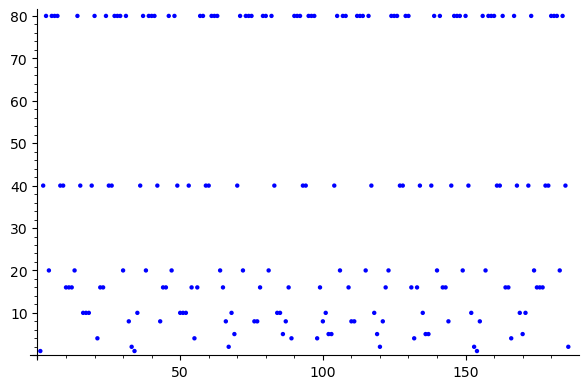

In [222]:
list_plot(l)

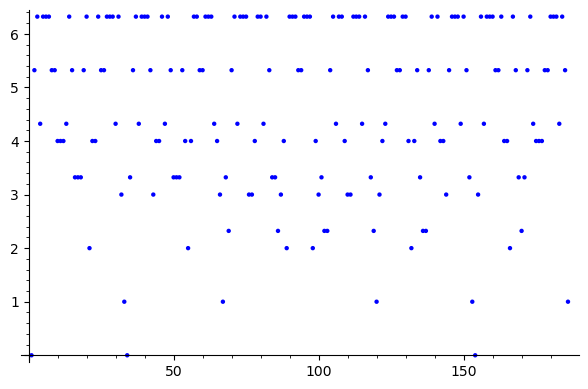

In [227]:
l2=[]
for x,y in l:
    l2.append((x,log(y,2)))
list_plot(l2)